In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv').to_numpy()

m, n = data.shape
np.random.shuffle(data)  

data_dev = data[0:1000].T
Y_dev = data_dev[0]  
X_dev = data_dev[1:n] / 255.  

data_train = data[1000:m].T
Y_train = data_train[0]  
X_train = data_train[1:n] / 255.  
_, m_train = X_train.shape


In [15]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [16]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A


In [17]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [18]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


In [19]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


In [21]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration: 0
Accuracy: 0.09885365853658537
Iteration: 10
Accuracy: 0.19
Iteration: 20
Accuracy: 0.2386341463414634
Iteration: 30
Accuracy: 0.2830731707317073
Iteration: 40
Accuracy: 0.33126829268292685
Iteration: 50
Accuracy: 0.39202439024390245
Iteration: 60
Accuracy: 0.4446341463414634
Iteration: 70
Accuracy: 0.4865609756097561
Iteration: 80
Accuracy: 0.5222439024390244
Iteration: 90
Accuracy: 0.5538536585365854
Iteration: 100
Accuracy: 0.5829268292682926
Iteration: 110
Accuracy: 0.6086585365853658
Iteration: 120
Accuracy: 0.6330975609756098
Iteration: 130
Accuracy: 0.6544390243902439
Iteration: 140
Accuracy: 0.6728048780487805
Iteration: 150
Accuracy: 0.6873414634146342
Iteration: 160
Accuracy: 0.7018048780487804
Iteration: 170
Accuracy: 0.7136585365853658
Iteration: 180
Accuracy: 0.7245121951219512
Iteration: 190
Accuracy: 0.7335609756097561
Iteration: 200
Accuracy: 0.7423658536585366
Iteration: 210
Accuracy: 0.7503414634146341
Iteration: 220
Accuracy: 0.7580731707317073
Iteration:

Prediction: [1]
Label: 1


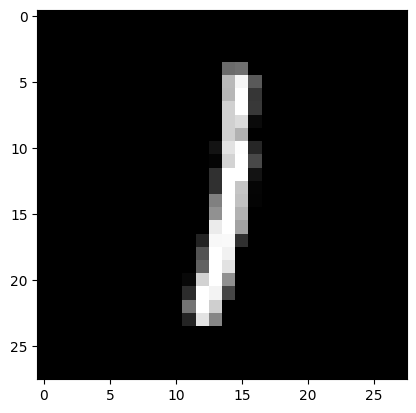

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
